In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Combining the data into a single dataset
animal_study= pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])
animal_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice
animal_study["Mouse ID"].nunique()

249

In [7]:
 # Creating a clean DataFrame by dropping the duplicate mouse by its ID.
animal_study.drop_duplicates()
animal_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Statistics

In [8]:
# Generating a summary table of mean, median, variance, standard deviation, and SEM(standard error) of the tumor volume for each regimen
mean = animal_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = animal_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = animal_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = animal_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = animal_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#assembling the results into a dataframe
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, 
                          "Standard Error": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts
* Generate a bar plot that shows the total number of measurements taken on each drug regimen using pyplot and pandas.
* Generate a pie plot showing the distribution of female versus male mice using pyplot and pandas


Bar Chart: Pyplot Method

In [9]:
#first,use the index.tolist() fuction to return a list of the names of the regimen
regimen= summary_df.index.tolist()
regimen

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [10]:
#second, use the to.list() function to return a list of the total measurement for each regimen
count= (animal_study.groupby(['Drug Regimen']).count())
total_measurement= count['Mouse ID'].tolist()
total_measurement

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

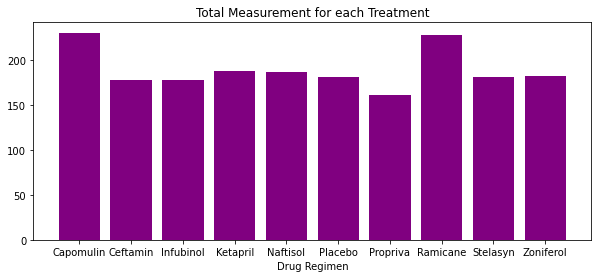

In [11]:
#create bar chart based on the data above
plt.figure(figsize=(10,4))
plt.bar(regimen, total_measurement, color="purple", align="center")

#chart title and x label
plt.title("Total Measurement for each Treatment")
plt.xlabel("Drug Regimen")

#save the image
plt.savefig("PyPlotBar.png")

Bar Chart: Pandas Method

In [12]:
regimen_p= (animal_study['Drug Regimen'].value_counts()).sort_index()
regimen_p

Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

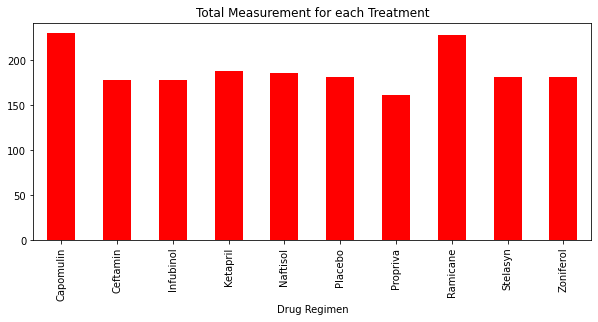

In [13]:
regimen_p.plot(kind="bar", facecolor="red", figsize=(10,4))

#chart title and x label
plt.title("Total Measurement for each Treatment")
plt.xlabel ("Drug Regimen")

#save the image
plt.savefig("PandasBar.png")

Pie Chart: Pyplot Method

In [14]:

#first use the groupby and count function to find the distribution of female and male mice
count= (animal_study.groupby(['Sex']).count())

#second, use the to.list() function to return a list of the sex and distribution
sex= count.index.tolist()
sex_count= count['Mouse ID'].tolist()

colors= ['purple', 'cyan']
explode= (0.1,0)
sex, sex_count

(['Female', 'Male'], [935, 958])

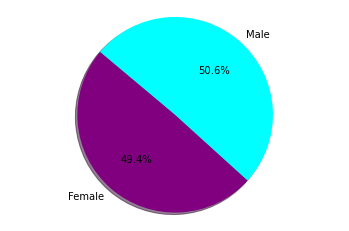

In [15]:
plt.pie(sex_count, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title= ("Mice Gender Distribution")

#save the image
plt.savefig("PyPlotPie.png")

Pie Chart: Pandas Method

In [16]:
#Spliting the data into groups based upon 'sex' and 'mouse id'
sex_p= (animal_study.groupby(['Sex'])['Mouse ID'].count())
sex_p

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

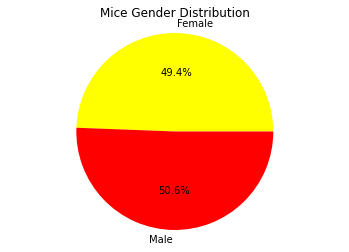

In [17]:
#Creating a pie chart based on the gender segregated data above
colors= ['yellow', 'red']

gender_distribution = sex_p.plot(kind="pie", y='Mouse ID', title=("Mice Gender Distribution"),autopct= '%1.1f%%', colors=colors)
gender_distribution.set_ylabel("")
plt.axis("equal")

#save the image
plt.savefig("PandasPie.png")

# Quartiles, Outliers and Boxplots

In [18]:
animal_study.groupby(['Mouse ID'])['Timepoint'].max()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

# Line and Scatter Plots

In [19]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = animal_study.loc[animal_study["Drug Regimen"] == "Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [20]:
r157_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "r157"]
r157_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0


In [21]:
r157_df= r157_df[['Timepoint','Tumor Volume (mm3)']]

timepoint= r157_df['Timepoint']
tumor_volume= r157_df['Tumor Volume (mm3)']

r157_df

,Timepoint,Tumor Volume (mm3)
1452,0,45.000000
1453,5,45.597064
1454,10,46.059608
1455,15,46.539206


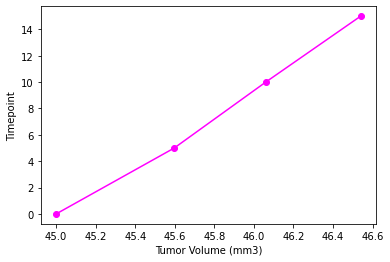

In [35]:
plt.plot(tumor_volume, timepoint, marker ='o', color='magenta')

#plt.title("Time Series of Tumor Volume for Mouse r157 treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")

#save line graph
plt.savefig("Time Series of Tumor Volume.png")

In [23]:
# Generating a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight= capomulin_df[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_weight

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [24]:
volume_mean = (capomulin_weight.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()

# Rename Tumor Volume column
volume_mean = volume_mean.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
volume_mean

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


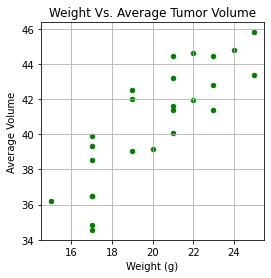

In [25]:
# Set the 'Mouse ID' as our index
volume_mean = volume_mean.set_index('Mouse ID')

#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
volume_mean.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),color='green',title="Weight Vs. Average Tumor Volume")

#save image
plt.savefig("Weight vs Average Tumor Volume.png")

# Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight= volume_mean['Weight (g)']
vol_mean= volume_mean['Average Volume']

correlation = st.pearsonr(weight,vol_mean)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


In [32]:
from scipy.stats import linregress

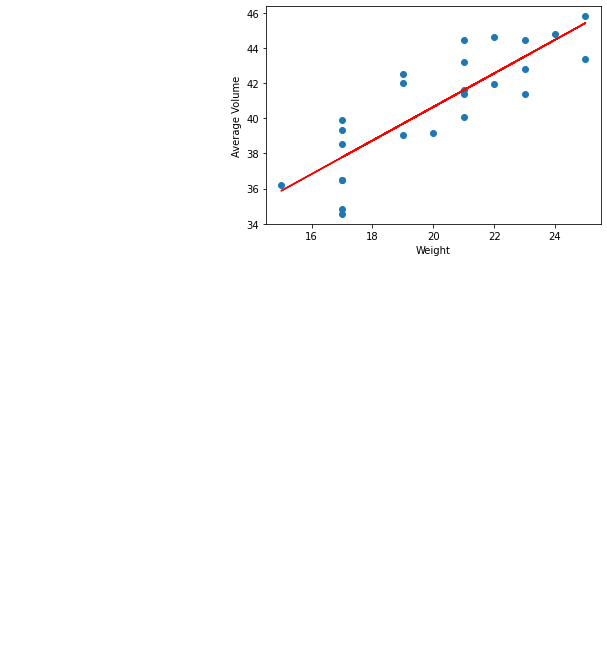

In [34]:
x_values = weight
y_values = vol_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Volume')

#save image
plt.savefig("Linear Regression.png")